### Fit a Random Forest model
To test if the data is trainable.  
To test the training time is acceptable.

In [3]:
# ! pip install -U scikit-learn

     ---------------------------------------- 7.5/7.5 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 40.1/40.1 MB 947.9 kB/s eta 0:00:00


In [16]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

x_train = pd.read_csv('x_train_norm.csv', header=None)
y_train = pd.read_csv('y_train_log.csv', header=None)
print(x_train.shape, y_train.shape)

(442471, 21) (442471, 1)


In [17]:
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(x_train, y_train)

C:\Users\luweb\AppData\Local\Temp\ipykernel_14136\4274906374.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train, y_train)


RandomForestRegressor(max_depth=4, random_state=0)

In [7]:
regr.score(x_train, y_train)

0.26287139100846724

In [14]:
from sklearn.metrics import mean_squared_error
x_test = pd.read_csv('x_test_norm.csv', header=None)
y_test = pd.read_csv('y_test_log.csv', header=None)
y_pred = regr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [20]:
mse

1.251628000824525

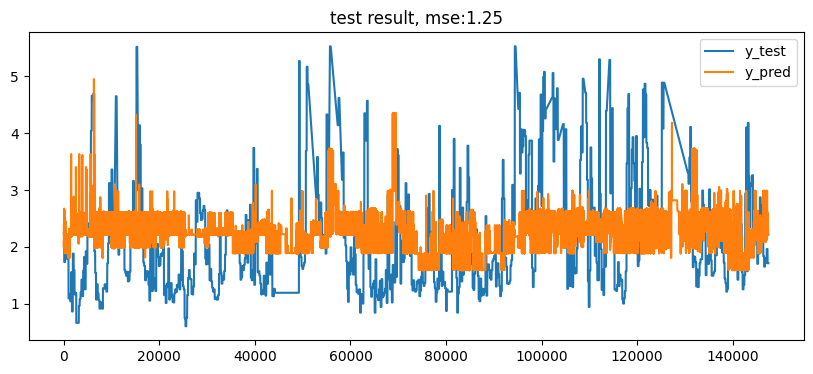

In [24]:
# test data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
x = list(range(len(y_test)))
plt.plot(x, y_test, label = "y_test")
plt.plot(x, y_pred, label = "y_pred")
plt.legend()
plt.title(f'test result, mse:{mse:.2f}')
plt.show()

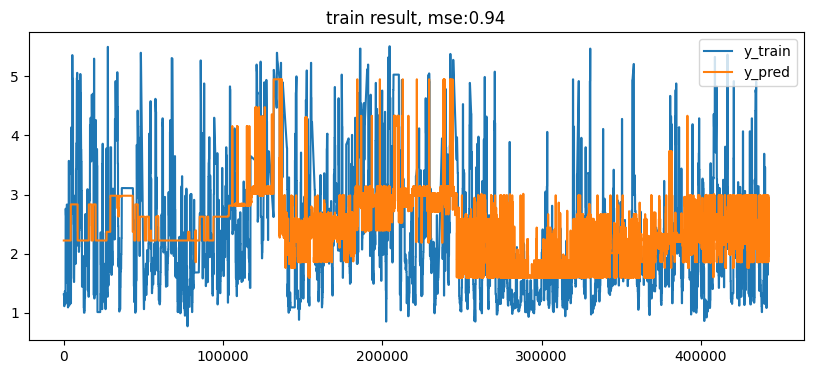

In [27]:
# train data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
x = list(range(len(x_train)))
y_train_pred = regr.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
plt.plot(x, y_train, label = "y_train")
plt.plot(x, y_train_pred, label = "y_pred")
plt.legend()
plt.title(f'train result, mse:{mse_train:.2f}')
plt.show()